In [5]:
#m
from math import radians,cos,sin,sqrt,asin,sqrt
def haversine(lon1,lat1,lon2,lat2):
    lon1,lat1,lon2,lat2 = map(radians,[lon1,lat1,lon2,lat2])
    
    dlon=lon2-lon1
    dlat=lat2-lat1
    a=sin(dlat/2)**2+cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c=2*asin(sqrt(a))
    r=6371
    return c*r*1000

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import keras as kr
import math
import datetime
import pickle
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",10000)
data=pd.read_csv(r'C:\Users\akari\109-111年乳攝設站時間、地點及醫療院所表-date+經緯度.csv',encoding ="utf-8")
#子抹腸篩皆可用同方法

In [64]:
data=data.drop(["時段"],axis=1)

In [4]:
data1=pd.read_csv(r'C:\Users\akari\便利商店_全.csv',encoding ="utf-8")

In [19]:
distance=[0]*2947

In [48]:
print(distance)

[7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,

In [67]:
distance=[0]*3165
for i in tqdm.tqdm_notebook(range(0,data.shape[0])):
    for j in range(0,data1.shape[0]):
        if haversine(data["longitude"][i],data["latitude"][i],data1["lng"][j],data1["lat"][j])<=1000:
            distance[i]+=1

C:\Users\akari\AppData\Local\Temp/ipykernel_31968/144553643.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0,data.shape[0])):


  0%|          | 0/3165 [00:00<?, ?it/s]

In [18]:
distance1=0
for j in range(0,data1.shape[0]):
        if haversine(data["longitude"][0],data["latitude"][0],data1["lng"][j],data1["lat"][j])<=5000:
            distance1+=1
print(distance1)

23


In [68]:
distance2=np.array(distance)
distance3=distance2.reshape(distance2.shape[0],1)
distance4=pd.DataFrame(distance3,columns=['CVS-1km'])#一公里有幾間便利商店

In [69]:
df=pd.concat([data,distance4],axis=1)

In [12]:
data2=pd.read_csv(r'C:\Users\akari\診所.csv',encoding ="utf-8")

In [49]:
data2.shape[0]

1909

In [71]:
clinic=[0]*3165
for i in tqdm.tqdm_notebook(range(0,data.shape[0])):
    for j in range(0,data2.shape[0]):
        if haversine(data["longitude"][i],data["latitude"][i],data2["lng"][j],data2["lat"][j])<=1000:
            clinic[i]+=1

C:\Users\akari\AppData\Local\Temp/ipykernel_31968/2118579720.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0,data.shape[0])):


  0%|          | 0/3165 [00:00<?, ?it/s]

In [72]:
print(clinic)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 

In [73]:
clinic2=np.array(clinic)
clinic3=clinic2.reshape(clinic2.shape[0],1)
clinic4=pd.DataFrame(clinic3,columns=['clinic-1km'])#一公里有幾間診所
df=pd.concat([data,distance4,clinic4],axis=1)

In [18]:
data3=pd.read_csv(r'C:\Users\akari\醫院.csv',encoding ="utf-8")

In [76]:
data3.shape[0]

36

In [77]:
hos=[0]*3165
for i in tqdm.tqdm_notebook(range(0,data.shape[0])):
    for j in range(0,data3.shape[0]):
        if haversine(data["longitude"][i],data["latitude"][i],data3["lng"][j],data3["lat"][j])<=1000:
            hos[i]+=1

C:\Users\akari\AppData\Local\Temp/ipykernel_31968/2986447273.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0,data.shape[0])):


  0%|          | 0/3165 [00:00<?, ?it/s]

In [78]:
print(hos)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [79]:
hos2=np.array(hos)
hos3=hos2.reshape(hos2.shape[0],1)
hos4=pd.DataFrame(hos,columns=['hospital-1km'])#一公里有幾間醫院
df=pd.concat([data,distance4,clinic4,hos4],axis=1)

In [81]:
df.to_csv(r'C:\Users\akari\109-111年乳攝設站時間、地點及醫療院所表-date+經緯度+1km.csv',index=False)

In [3]:
df1=pd.read_csv(r'C:\Users\akari\109-111年腸攝設站時間、地點及醫療院所表-date+經緯度+1km.csv',encoding ="utf-8")
df2=pd.read_csv(r'C:\Users\akari\109-111年抹攝設站時間、地點及醫療院所表-date+經緯度+1km.csv',encoding ="utf-8")
df3=pd.read_csv(r'C:\Users\akari\109-111年乳攝設站時間、地點及醫療院所表-date+經緯度+1km.csv',encoding ="utf-8")

In [4]:
df=pd.concat([df1,df2,df3],axis=0)

In [5]:
df.sort_values(by=["year"],inplace=True,ignore_index=True)

In [32]:
df.shape

(8976, 15)

In [33]:
#刪除地址前有數字的
for i in tqdm.tqdm_notebook(range(0,df.shape[0])):
    bb=df["地址"][i]
    while bb[0].isdigit() :
        bb=bb[1:]
    df["地址"][i]=bb

C:\Users\akari\AppData\Local\Temp/ipykernel_26752/2028905302.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0,df.shape[0])):


  0%|          | 0/8976 [00:00<?, ?it/s]

C:\Users\akari\AppData\Local\Temp/ipykernel_26752/2028905302.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["地址"][i]=bb


In [34]:
#臺->台
for i in tqdm.tqdm_notebook(range(0,df.shape[0])):
    if "臺" in df["地址"][i]:
        df["地址"][i]=df["地址"][i].replace("臺","台")

C:\Users\akari\AppData\Local\Temp/ipykernel_15100/1294608383.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0,df.shape[0])):


  0%|          | 0/8976 [00:00<?, ?it/s]

C:\Users\akari\AppData\Local\Temp/ipykernel_15100/1294608383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["地址"][i]=df["地址"][i].replace("臺","台")


In [36]:
df.to_csv(r'C:\Users\akari\站點資料統合.csv',index=False)

13    1020
2      950
24     811
0      724
10     723
7      643
20     617
12     487
1      420
23     378
9      315
4      247
6      239
8      207
3      207
14     138
11     131
5      101
15      87
18      85
21      72
22      60
16      55
28      46
26      44
19      42
27      25
17      20
33      16
25      14
32      14
29      10
31      10
34       9
30       8
35       1
Name: CVS-1km, dtype: int64


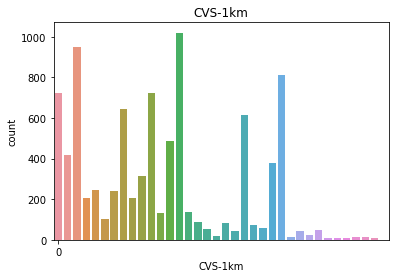

<Figure size 7200x7200 with 0 Axes>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
def plot_area_state(df,n):
  ax = sns.countplot(x=n,data=df)
  plt.title(n)
  plt.figure(figsize=(100,100))
  tick_spacing = df.index.size/5 # x軸密集度
  ax.xaxis.set_major_locator(mticker.MultipleLocator(tick_spacing))
  print(df[n].value_counts())
  
  for p in ax.patches:
    #percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    #ax.annotate(percentage, (x, y),ha='center')
  plt.show()

plot_area_state(df,"CVS-1km")

0      806
153    724
45     559
19     530
2      516
14     515
15     372
112    345
42     297
53     253
1      240
12     235
29     226
20     206
87     199
11     199
13     198
26     196
6      182
7      178
5      154
4      145
3      120
23     104
80      86
83      80
59      74
31      69
27      57
9       55
71      54
57      49
67      44
30      40
34      40
63      38
131     31
95      30
64      30
24      30
58      29
16      28
28      27
17      27
117     26
101     25
10      25
73      21
25      21
75      21
44      20
93      18
120     18
79      16
111     15
106     14
86      14
92      13
98      13
32      12
18      12
40      11
91      11
61      10
48      10
74      10
56      10
102     10
22      10
82       9
140      8
114      8
128      8
35       7
113      7
100      7
88       7
144      7
115      7
122      7
99       6
8        6
121      5
38       5
50       4
47       4
90       4
89       4
119      4
103      3
147      3

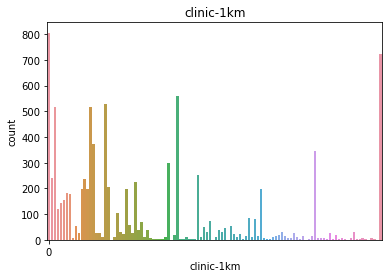

<Figure size 7200x7200 with 0 Axes>

In [3]:
plot_area_state(df,"clinic-1km")

0    6537
1    1362
3     554
5     368
2     137
8       7
6       7
4       4
Name: hospital-1km, dtype: int64


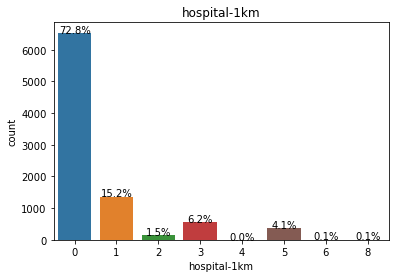

In [41]:
plot_area_state(df,"hospital-1km")

25     213
21     210
15     207
23     206
13     206
32     201
18     194
12     193
20     191
28     189
16     188
22     188
14     187
19     185
11     185
33     184
27     180
30     180
24     176
31     172
26     168
10     167
34     165
17     158
36     150
29     150
35     147
9      145
8      142
37     135
39     132
38     130
43     124
7      123
41     122
40     121
5      117
45     113
42     110
4      105
6      104
46      96
44      95
47      95
3       94
50      86
52      81
51      81
54      78
56      71
48      69
49      68
53      65
57      64
2       61
1       61
61      54
55      54
59      52
62      50
60      49
66      44
58      43
63      41
65      40
69      36
67      35
74      33
68      33
75      32
71      30
64      28
70      25
76      23
72      22
77      21
79      20
83      19
80      18
78      18
81      16
88      16
82      15
73      14
99      13
84      13
85      12
87      12
101     11
86      11
89      11

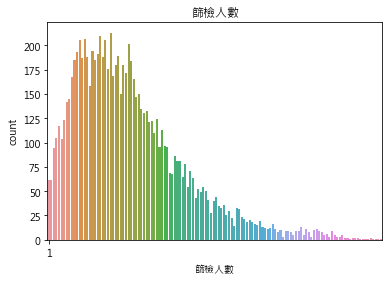

<Figure size 7200x7200 with 0 Axes>

In [4]:
plt.rcParams["font.family"]=["Microsoft JhengHei"]
plt.rcParams["font.sans-serif"]=["KaiTi"]
plt.rcParams["font.serif"]=["KaiTi"]
plt.rcParams["axes.unicode_minus"]=False
plot_area_state(df,"篩檢人數")

In [118]:
gb=df.groupby("地址")

In [119]:
pd.set_option("display.max_rows",10)
pd.set_option("display.max_columns",10)

In [152]:
gb.agg({"篩檢人數":"sum"})

,篩檢人數
地址,
台南市新營區開元路 154 號,51
台南市楠西區密枝里70號,20
x,118
下營區茅港里81號,37
仁德區中正路二段1247號,15
南化區西埔里59號之1,9
南區長南街29號,325
台南巿仁德區後壁里24鄰中正路二段209號,159
台南巿柳營區山子腳1-8號,228


In [178]:
cc=gb.agg({"篩檢人數":"sum"})

In [179]:
fliter = (cc["篩檢人數"]>1000) 
a1=cc[fliter]

In [180]:
cc=gb.agg({"CVS-1km":"sum"})

In [181]:
fliter = (cc["CVS-1km"]>1000) 
a2=cc[fliter]

In [182]:
cc=gb.agg({"clinic-1km":"sum"})

In [183]:
fliter = (cc["clinic-1km"]>1000) 
a3=cc[fliter]

In [159]:
cc=gb.agg({"hospital-1km":"sum"})

In [160]:
fliter = (cc["hospital-1km"]>0) 
a4=cc[fliter]

In [184]:
ddf=pd.merge(a1,a2,on="地址",how="outer")

In [185]:
dddf=pd.merge(ddf,a3,on="地址",how="outer")

In [163]:
ddddf=pd.merge(dddf,a4,on="地址",how="outer")

In [186]:
ddddf.to_csv(r'C:\Users\akari\最多數量地址.csv',index=True)#同理最少數量地址也能改篩選條件使用相同方法得出

In [3]:

#data=pd.read_csv(r'C:\Users\akari\最多數量地址.csv',encoding ="utf-8")
df=pd.read_csv(r'C:\Users\akari\站點資料統合.csv',encoding ="utf-8")
data=pd.read_csv(r'C:\Users\akari\最少數量地址.csv',encoding ="utf-8")


In [10]:
display(data)

,地址,篩檢人數,CVS-1km,clinic-1km,hospital-1km
0,台南市楠西區密枝里70號,20.0,4.0,8.0,0.0
1,仁德區中正路二段1247號,15.0,0.0,0.0,0.0
2,南化區西埔里59號之1,9.0,0.0,0.0,0.0
3,台南市 南化區北寮里3號,15.0,1.0,2.0,0.0
4,台南市七股區379號,25.0,2.0,2.0,0.0
5,台南市七股區三股里3鄰39號,19.0,0.0,0.0,0.0
6,台南市七股區中寮里中寮63-2號,8.0,0.0,0.0,0.0
7,台南市七股區大潭里1鄰台潭1號,12.0,1.0,0.0,0.0
8,台南市七股區竹橋里11鄰130號,26.0,2.0,2.0,0.0
9,台南市七股區龍山里10鄰211-33號,17.0,6.0,6.0,0.0


In [5]:
data1=data

In [6]:
data1=pd.DataFrame()
li=[]
for i in range(0,data.shape[0]):
    counter=0
    if not pd.isna(data["篩檢人數"][i]):
        counter+=1
    if not pd.isna(data["CVS-1km"][i]):
        counter+=1
    if not pd.isna(data["clinic-1km"][i]):
        counter+=1
    if not pd.isna(data["hospital-1km"][i]):
        counter+=1
    if counter>=4:
        li.append(i)
len(li)

128

In [7]:
###
fliter = (pd.isna(data["篩檢人數"])!=True) & (pd.isna(data["CVS-1km"])!=True) & (pd.isna(data["clinic-1km"])!=True) & (pd.isna(data["hospital-1km"])!=True)
data1=data[fliter]
data1.sort_values(by=["篩檢人數"],inplace=True,ignore_index=True,ascending=False)

C:\Users\akari\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
for i in tqdm.tqdm_notebook(range(0,data1.shape[0])):#一公里內CVS,clinic,hospital實際數量
    w=0
    for j in range(0,df.shape[0]):
        if data1["地址"][i] ==  df["地址"][j]:
            w+=1
    print(w)
    data1["CVS-1km"][i]=data1["CVS-1km"][i]/w
    data1["clinic-1km"][i]=data1["clinic-1km"][i]/w
    data1["hospital-1km"][i]=data1["hospital-1km"][i]/w

C:\Users\akari\AppData\Local\Temp/ipykernel_70352/2445885924.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0,data1.shape[0])):


  0%|          | 0/128 [00:00<?, ?it/s]

1


C:\Users\akari\AppData\Local\Temp/ipykernel_70352/2445885924.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["CVS-1km"][i]=data1["CVS-1km"][i]/w
C:\Users\akari\AppData\Local\Temp/ipykernel_70352/2445885924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["clinic-1km"][i]=data1["clinic-1km"][i]/w
C:\Users\akari\AppData\Local\Temp/ipykernel_70352/2445885924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["hos

2
1
3
1
1
1
2
1
1
2
1
1
2
1
1
1
1
1
1
2
1
2
2
1
1
1
1
2
1
2
1
1
2
1
1
1
1
1
1
3
1
1
2
1
1
1
1
1
1
1
1
3
1
1
3
1
1
1
1
1
1
2
2
1
1
1
1
1
2
1
1
1
1
1
1
1
3
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1


In [14]:
data1.sort_values(by=["篩檢人數"],inplace=True,ignore_index=True)

C:\Users\akari\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [17]:
display(data1)

,地址,篩檢人數,CVS-1km,clinic-1km,hospital-1km
0,台南市西港區慶安里新興街107巷32號,1.0,8.0,7.0,0.0
1,台南市山上區玉峯里玉峯35號,1.0,2.0,1.0,0.0
2,台南市左鎮區中正里171-3號,1.0,0.0,1.0,0.0
3,台南市安定區安定里領寄7-2號.,1.0,6.0,0.0,0.0
4,台南市山上區43號,1.0,2.0,1.0,0.0
5,台南市西港區後營里275號,3.0,8.0,7.0,0.0
6,台南市西港區劉厝里8鄰58號,3.0,8.0,7.0,0.0
7,台南市柳營區中山西路段128號,3.0,3.0,2.0,0.0
8,柳營區柳營路東段1180地號 (柳營回收廠),3.0,0.0,0.0,0.0
9,台南市學甲區宅港里宅子港61號,4.0,0.0,0.0,0.0


In [16]:
lon=[0]*128
lat=[0]*128
for i in tqdm.tqdm_notebook(range(0,data1.shape[0])):
    for j in range(0,df.shape[0]):
        if data1["地址"][i] ==  df["地址"][j]:
            lat[i]=df["latitude"][j]
            lon[i]=df["longitude"][j]
            break;
    

C:\Users\akari\AppData\Local\Temp/ipykernel_70352/1296140353.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0,data1.shape[0])):


  0%|          | 0/128 [00:00<?, ?it/s]

In [22]:
l=[0]*256
l=np.array(l)
l=l.reshape(128,2)
data2=data1.values
lon2=np.array(lon)
lon3=lon2.reshape(lon2.shape[0],1)
lat2=np.array(lat)
lat3=lat2.reshape(lat2.shape[0],1)
f=pd.DataFrame(np.hstack((data2,lon3,lat3,l)),columns=['地址',"篩檢人數","CVS-1km","clinic-1km","hospital-1km",'longitude','latitude',"同一區站點數","離該區最好的站點之距離"])


In [23]:
f.head(2)

,地址,篩檢人數,CVS-1km,clinic-1km,hospital-1km,longitude,latitude,同一區站點數,離該區最好的站點之距離
0,台南市西港區慶安里新興街107巷32號,1.0,8.0,7.0,0.0,120.200313,23.123802,0,0
1,台南市山上區玉峯里玉峯35號,1.0,2.0,1.0,0.0,120.35238,23.103643,0,0


In [ ]:
def distance(a,b):
    for i in range(0,df.shape[0]):
        if df["地址"][i]==a:
            lo1=df["longitude"][i]
            la1=df["latitude"][i]
            break
    for i in range(0,df.shape[0]):
        if df["地址"][i]==b:
            lo2=df["longitude"][i]
            la2=df["latitude"][i]
            break
    return(haversine(lo1,la1,lo2,la2))

In [259]:
#算各區的每日篩檢人數提升率
gbg=df.groupby("地址")
ccc=gbg.agg({"篩檢人數":"sum"})
ccc.to_csv(r'C:\Users\akari\地址sum.csv',index=True)
ccc=pd.read_csv(r'C:\Users\akari\地址sum.csv',encoding ="utf-8")
count=0
num=0
l=[]
eff=0
for i in range(0,df.shape[0]):
    if "永康區" in  df["地址"][i]:
        num+=df["篩檢人數"][i]
        count+=1
        l.append(i)
#print(len(l))
mean=num/count
#print(num)
#print(count)
#print(mean)
for i in range(0,len(l)):
    for j in range(0,data1.shape[0]):
        if df["地址"][l[i]]==data1["地址"][j]:
            #print(data1["地址"][j])
            num-=df["篩檢人數"][l[i]]
            #print(df["篩檢人數"][l[i]])
            count-=1
#print(num)
#print(count)
#print(num/count)
eff+=(num/count-mean)
print(eff)

0.054034098536718034


In [17]:
f.sort_values(by=["篩檢人數","CVS-1km","clinic-1km"],inplace=True,ignore_index=True)

In [75]:
display(f)

,地址,篩檢人數,CVS-1km,clinic-1km,hospital-1km,longitude,latitude,同一區站點數,離該區最好的站點之距離
0,台南市左鎮區中正里171-3號,1.0,0.0,1.0,0.0,120.409037,23.056729,10,0.0
1,台南市山上區玉峯里玉峯35號,1.0,2.0,1.0,0.0,120.35238,23.103643,14,0.0
2,台南市山上區43號,1.0,2.0,1.0,0.0,120.35238,23.103643,14,0.0
3,台南市安定區安定里領寄7-2號.,1.0,6.0,0.0,0.0,120.259667,23.11316,26,2498.226277
4,台南市西港區慶安里新興街107巷32號,1.0,8.0,7.0,0.0,120.200313,23.123802,24,308.050229
5,柳營區柳營路東段1180地號 (柳營回收廠),3.0,0.0,0.0,0.0,120.313076,23.265213,13,5175.8754
6,台南市柳營區中山西路段128號,3.0,3.0,2.0,0.0,120.308183,23.276168,13,4901.554216
7,台南市西港區後營里275號,3.0,8.0,7.0,0.0,120.203391,23.122921,24,41.563939
8,台南市西港區劉厝里8鄰58號,3.0,8.0,7.0,0.0,120.203391,23.122921,24,41.563939
9,台南市山上區明和里北勢洲36號,4.0,0.0,0.0,0.0,120.334861,23.109643,14,1911.880093


In [74]:
#算各區的同一區站點數&離該區最好的站點之距離並填入f
gbg=df.groupby("地址")
ccc=gbg.agg({"篩檢人數":"sum"})
ccc.to_csv(r'C:\Users\akari\地址sum.csv',index=True)
ccc=pd.read_csv(r'C:\Users\akari\地址sum.csv',encoding ="utf-8")
l=[]
maxnum=0
for i in tqdm.tqdm_notebook(range(0,ccc.shape[0])):
    if "永康區" in  ccc["地址"][i]:
        l.append(i)
        if ccc["篩檢人數"][i]>maxnum:
            maxnum= ccc["篩檢人數"][i]
            maxstop=ccc["地址"][i]
print(maxstop)
#print(maxnum)
print(len(l))
"""
for i in range(0,len(l)):
    display(ccc[l[i]:l[i]+1])
    distance(maxstop,ccc["地址"][l[i]])
"""

for j in range(0,f.shape[0]):
        if "永康區" in f["地址"][j]:
            f["同一區站點數"][j]= len(l) 
            f["離該區最好的站點之距離"][j]=distance(maxstop,f["地址"][j])

C:\Users\akari\AppData\Local\Temp/ipykernel_2180/1452593176.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0,ccc.shape[0])):


  0%|          | 0/684 [00:00<?, ?it/s]

台南市永康區永康里文化路51號
23


In [ ]:
f.to_csv(r'C:\Users\akari\真最少數量地址+經緯度+距離數量.csv',index=False)

In [224]:
l=[]
for i in tqdm.tqdm_notebook(range(0,data1.shape[0])):
    if "左鎮區" in  data1["地址"][i]:
        l.append(i)
print(len(l))
for i in range(0,len(l)):
    display(data1[l[i]:l[i]+1])

C:\Users\akari\AppData\Local\Temp/ipykernel_36896/2819514452.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0,data1.shape[0])):


  0%|          | 0/128 [00:00<?, ?it/s]

6


,地址,篩檢人數,CVS-1km,clinic-1km,hospital-1km
2,台南市左鎮區中正里171-3號,1.0,0.0,1.0,0.0


,地址,篩檢人數,CVS-1km,clinic-1km,hospital-1km
46,台南市左鎮區榮和里60-7號,11.0,0.0,1.0,0.0


,地址,篩檢人數,CVS-1km,clinic-1km,hospital-1km
50,台南市左鎮區岡林里31號,12.0,0.0,0.0,0.0


,地址,篩檢人數,CVS-1km,clinic-1km,hospital-1km
61,台南市左鎮區睦光里58-1號,14.0,0.0,1.0,0.0


,地址,篩檢人數,CVS-1km,clinic-1km,hospital-1km
72,台南市左鎮區澄山里澄山116號,17.0,0.0,0.0,0.0


,地址,篩檢人數,CVS-1km,clinic-1km,hospital-1km
103,台南市左鎮區二寮里2鄰16號,25.0,0.0,1.0,0.0


In [ ]:
d=pd.read_csv(r'C:\Users\akari\真最少數量地址+經緯度.csv',encoding ="utf-8")
e=pd.read_csv(r'C:\Users\akari\真最多數量地址+經緯度.csv',encoding ="utf-8")

In [2]:
from selenium import webdriver

chrome_options = webdriver.ChromeOptions() 
browser = webdriver.Chrome(options=chrome_options) #載入瀏覽器設定 
targetUrl = 'https://www.map.com.tw/'
browser.get(targetUrl)

In [30]:
import folium # 匯入 folium 套件

# 建立地圖與設定位置

fmap = folium.Map(location=[23.15, 120.3], zoom_start=20)
 # 在notebook中顯示地圖
#fmap = folium.Map(location=[35.709635, 139.810851], zoom_start=17)
for i in tqdm.tqdm_notebook(range(0,d.shape[0])):
    fmap.add_child(folium.CircleMarker(location=[d["latitude"][i], d["longitude"][i]]))
    
#fmap 

C:\Users\akari\AppData\Local\Temp/ipykernel_22956/414922723.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0,d.shape[0])):


  0%|          | 0/128 [00:00<?, ?it/s]

In [5]:
import folium # 匯入 folium 套件

# 建立地圖與設定位置
incidents = folium.map.FeatureGroup()


 # 在notebook中顯示地圖
#fmap = folium.Map(location=[35.709635, 139.810851], zoom_start=17)
for i in tqdm.tqdm_notebook(range(0,d.shape[0])):
    incidents.add_child(folium.CircleMarker([d["latitude"][i], d["longitude"][i]],
            radius=3,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.4))
for i in tqdm.tqdm_notebook(range(0,e.shape[0])):
    incidents.add_child(folium.CircleMarker([e["latitude"][i], e["longitude"][i]],
            radius=3,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.4))
fmap = folium.Map(location=[23.15, 120.3], zoom_start=20)  
fmap .add_child(incidents)
fmap 

C:\Users\akari\AppData\Local\Temp/ipykernel_7748/3139315438.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0,d.shape[0])):


  0%|          | 0/128 [00:00<?, ?it/s]

C:\Users\akari\AppData\Local\Temp/ipykernel_7748/3139315438.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0,e.shape[0])):


  0%|          | 0/64 [00:00<?, ?it/s]